# Implement Clustering Metrics Functions

In [33]:
def precision_bcubed(y_test, y_pred):
    m = y_test.shape[0]
    correctness = np.zeros((m, m))
    pr_bcubed = 0
    
    for i in range(m ):
        for j in range(m):
            if (y_test[i] == y_test[j] and y_pred[i] == y_pred[j] or 
                y_test[i] != y_test[j]  and y_pred[i] != y_pred[j]):
                
                correctness[i][j] += 1
        pr_bcubed += (sum(correctness[i, y_pred == y_pred[i]]) - 1 )/ (sum(y_pred == y_pred[i]) - 1)
        
    
    
    
        
    
    
    return pr_bcubed / m

def recall_bcubed(y_test, y_pred):
    m = y_test.shape[0]
    correctness = np.zeros(m, m)
    rc_bcubed = 0
    
    for i in range(m ):
        for j in range(m):
            if (y_test[i] == y_test[j] and y_pred[i] == y_pred[j] or 
                y_test[i] != y_test[j]  and y_pred[i] != y_pred[j]):
                
                correctness[i][j] += 1
        rc_bcubed += (sum(correctness[i, y_test == y_test[i]]) - 1 )\
        /(sum(y_test == y_test[i]) - 1)
        
    
    
    
        
    
    
    return rc_bcubed / m
    
    

def f1_bcubed(precision, recall):
    return 2 * (precision**(-1) + recall**(-1))**(-1)

In [70]:
def silhouette_Nairi(X, y_pred):
    s = []
    for i in range(len(y_pred)):
        b_i = []
        for j in np.unique(y_pred):
            if y_pred[i] == j:
                a_i = np.linalg.norm(X[i]-X[y_pred==y_pred[i]], axis=1)
                a_i = a_i.mean()*len(a_i)/(len(a_i)-1)
            else:
                b_i.append((np.linalg.norm(X[i]-X[y_pred==j], axis=1).mean()))
        b_i = min(b_i)
        s.append((b_i-a_i)/max(b_i, a_i))
    return np.mean(s)

In [105]:
def silhouette_Laura(x, y_pred):
    c = np.unique(y_pred)
    list_s = []
    for i in range(len(y_pred)):
        dict_c = dict()
        dist_same = [] 
        for cluster in c:
            dict_c[cluster]=[]
        for j in range(len(y_pred)):
            if y_pred[i]==y_pred[j]:
                dist_same.append(np.linalg.norm(x[i]-x[j]))
            if y_pred[i] != y_pred[j]:
                dict_c[y_pred[j]].append(np.linalg.norm(x[i]-x[j])) 
        a = sum(dist_same)/(len(dist_same)-1)
        mean_c = [np.mean(cluster) for cluster in dict_c.values() if len(cluster)!=0]
        b = min(mean_c)
        s = (b-a)/max(b,a)
        list_s.append(s)
    return np.mean(list_s)
    

In [65]:
from sklearn.metrics import silhouette_score

In [71]:
silhouette_score(X_circles, y_circles)

0.07710670400971859

In [69]:
silhouette_Nairi(X_circles, y_circles)

0.0771067040097186

In [106]:
silhouette_Laura(X_circles, y_circles)

0.07710670400971859

# Experimenting

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.preprocessing import StandardScaler

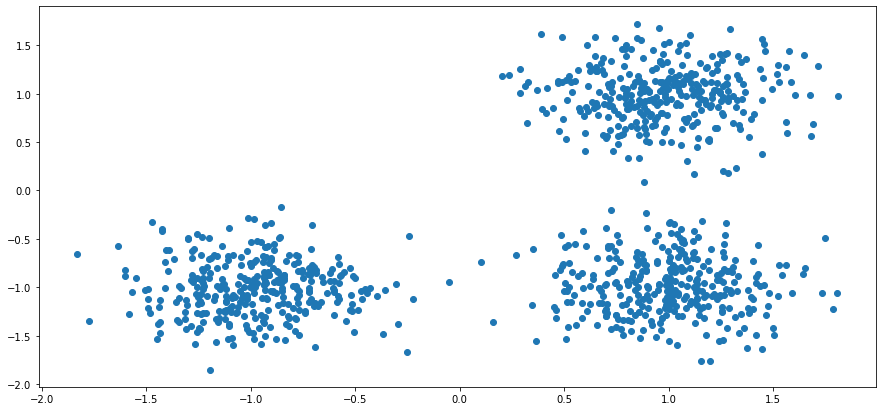

In [19]:
centers = [[1, 1], [-1, -1], [1, -1]]
X_blobs, y_blobs = make_blobs(n_samples=1000, centers=centers, cluster_std=0.3,
                            random_state=0)
plt.figure(figsize=(15,7))
plt.scatter(X_blobs[:,0], X_blobs[:,1])
plt.show()

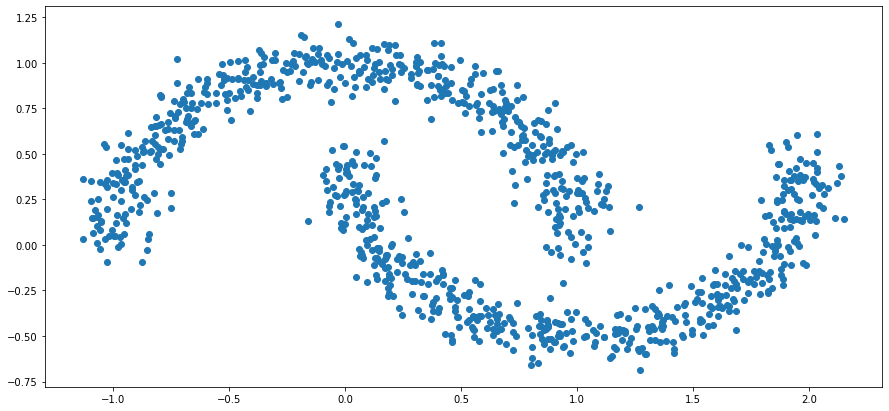

In [20]:
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=0)
plt.figure(figsize=(15,7))
plt.scatter(X_moons[:,0], X_moons[:,1])
plt.show()

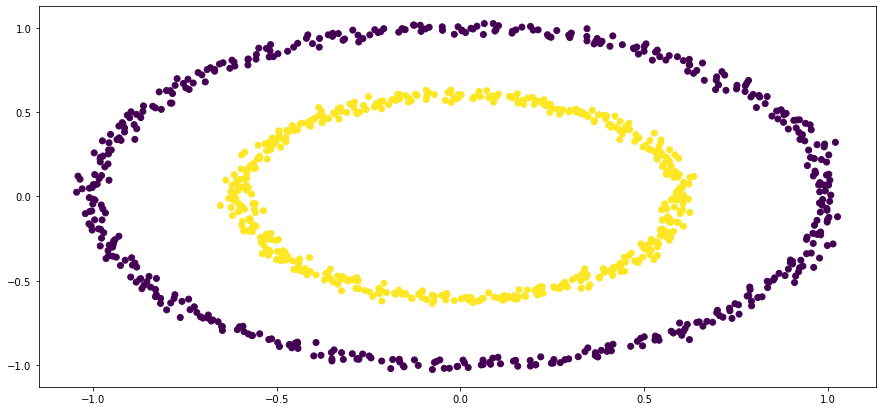

In [60]:
X_circles, y_circles = make_circles(n_samples=1000, noise=0.02, factor=0.6, random_state=0)
plt.figure(figsize=(15,7))
plt.scatter(X_circles[:,0], X_circles[:,1], c=y_circles)
plt.show()

In [22]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, SpectralClustering
from sklearn.mixture import GaussianMixture

In [90]:
# Apply all this algorithms to 3 datasets above, plot the results
# Apply your implemented metrics on your predictions
# Check if the better result by plot brings the better score

In [37]:
km = KMeans(n_clusters = 2).fit(X_circles)

In [38]:
y_pred = km.predict(X_circles)

In [40]:
precision_bcubed(y_circles, y_pred)

0.49899999999999817